In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import random

B_all = []
B_images = []
tdiachua = []
tgiaykhangsinh = []
tvungvokhuan = []

images_path = os.path.join(os.getcwd(), '/home/trdoan20/dev/cpp/CV/ImageSets/')
annotations_path = os.path.join(os.getcwd(), '/home/trdoan20/dev/cpp/CV/SegmentationClass/')

images_name = os.listdir(images_path)
annotations_name = os.listdir(annotations_path)

images_name_train, images_name_test, annotations_name_train, annotations_name_test = [], [], [], []
# print(images_name_train == annotations_name_train)
# base_dir = '/home/tdoan20/dev/cpp/CV/ImageBase/notblood/'
# os.chdir(working_dir)
# !ls
images_path = os.path.join(os.getcwd(), '/home/trdoan20/dev/cpp/CV/ImageSets/')
annotations_path = os.path.join(os.getcwd(), '/home/trdoan20/dev/cpp/CV/SegmentationClass/')

images_name = os.listdir(images_path)
annotations_name = os.listdir(annotations_path)

images_name_train, images_name_test = train_test_split(images_name, train_size=0.8)
# print(len(images_name_train), len(images_name_test))
annotations_name_test = images_name_test.copy()
annotations_name_train = images_name_train.copy()
for i in range(len(annotations_name_test)):
    annotations_name_test[i] = annotations_name_test[i].replace('jpg', 'png')
for i in range(len(annotations_name_train)):
    annotations_name_train[i] = annotations_name_train[i].replace('jpg', 'png')
images_name_train.sort()
images_name_test.sort()
annotations_name_train.sort()
annotations_name_test.sort()


    

### Doc Image

In [3]:
def docImage(filename):
    image_path = os.path.join(images_path, filename)
    # print(image_path)
    image = cv2.imread(image_path)
    # plt.imshow(image)
    return image

### 3 Doc Truth Image

In [4]:

def docTruthImage(filename):
    ano_path = os.path.join(annotations_path, filename)
    anotati = cv2.imread(ano_path)
    return anotati


[ 51 102 240]


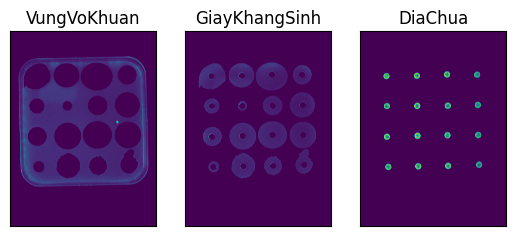

In [65]:
# plt.subplot(1, 2, 1)
# print(images_name_train[0])
# plt.imshow(docImage(images_name_train[0]))
# plt.title('Original')
# plt.xticks([])
# plt.yticks([])
# plt.subplot(1, 2, 2)
# # print(annotations_name_train[0])
# plt.imshow(docTruthImage(annotations_name_train[0]))
# plt.title('Ground Truth')
# plt.xticks([])
# plt.yticks([])
ano = docTruthImage(annotations_name_train[0])
B = ano[:,:,2]
cl = np.unique(B)[1:]
print(cl)
j = 1
img = docImage(images_name_train[0])[:, :, 2]
tick = ['VungVoKhuan', 'GiayKhangSinh', 'DiaChua']
for i in cl:
    C = img.copy()
    D = B.copy()
    # print(np.where(B != 102))
    D[np.where(D != i)] = 0
    # plt.imshow(B)
    C[np.where(D==0)] = 0
    plt.subplot(1, 3, j)
    plt.imshow(C)
    plt.title(tick[j-1])
    plt.xticks([])
    plt.yticks([])
    j += 1
    

### Thay pattern theo labelmap.txt cho từng class

In [14]:
patern = [102,255,102]
patern = patern[::-1]
# Blue, Red, Green = [], [], []
B_imgs = [[], [], []]
# ii = docImage('luma_box8_82837cfd-e217-4cf7-97fb-353adc4ed2c6.jpg')
# aa = docTruthImage('luma_box8_82837cfd-e217-4cf7-97fb-353adc4ed2c6.png')
# plt.imshow(aa)
# # colors = np.unique(aa[:,:,0])
# # print(colors)
# vvk = aa[:, :, 0].copy()
# vvk[np.where(vvk==102)] = 0
# Bt = np.array(ii[:,:,0])
# Bt[np.where(vvk==0)] = 0
# plt.imshow(Bt)
for i in images_name_train:
    img = docImage(i)
    j = i
    ano = docTruthImage(j.replace('jpg', 'png'))
    for k in range(3):
        C = img[:, :, k].copy()
        D = ano[:, :, k].copy()
        D[np.where(D != patern[k])] = 0
        C[np.where(D == 0)] = 0
        # Bt = np.array(img[:, :, k])
        # Bt[np.where(vvk)==0] = 0
        # plt.imshow(C)
        C = C[:]
        B_imgs[k].append(C[C>0])

In [15]:
print(len(B_imgs))
MIN, MAX = [], []
for i in range(3):
    B_alll = np.concatenate(B_imgs[i])
    B_mean = np.mean(B_alll)
    B_std = np.std(B_alll)
    Low = B_mean - B_std
    High = B_mean + B_std
    MIN.append(Low)
    MAX.append(High)
print(MIN, MAX)

3
[31.98269781908826, 39.648500368423214, 43.84167060079963] [65.35359564500477, 76.53333397001862, 79.84186726303254]


In [90]:
def cal(prediction, ground_truth):
    pixel_accuracy = np.sum(ground_truth == prediction) / np.size(ground_truth)
    return pixel_accuracy

In [96]:
def iou_measure(predict: np.ndarray, mask: np.ndarray):
    intersect = np.sum(np.all((predict & mask) != [0, 0, 0], axis=2))
    union = np.sum(np.all((predict | mask) != [0, 0, 0], axis=2))
    return intersect / union

0.5478311821634004 0.27720239489627374


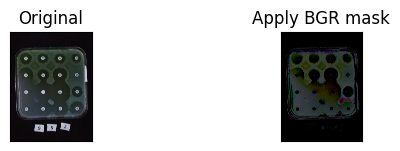

In [108]:
import random as rr
MIN = [31.98, 39.64, 43.84]
MAX = [65.35, 76.53, 79.84]

dict = [7,0, 2]
me = []
pi = []
plt.subplot(3, 2, 1)
plt.title('Original')
plt.subplot(3, 2, 2)
plt.title('Apply BGR mask')

# plt.subplot(3, 4, 1), plt.title('Original')
# plt.subplot(3, 4, 2), plt.title('Blue')
# plt.subplot(3, 4, 3), plt.title('Green')
# plt.subplot(3, 4, 4), plt.title('Red')
# 952_IMG_20180928_195025
for i in range(1):
    # print(i)
    # p = rr.randint(0, 100) % 10
    # while p in dict:
        # p = rr.randint(0, 100) % 10
    # dict.append(p)
    img = docImage('952_IMG_20180928_195025.jpg')
    E = np.zeros(img.shape)
    tru = docTruthImage('952_IMG_20180928_195025.png')
    IMG = img.copy()
    # print(IMG.shape)
    tit = ['Blue', 'Green', 'Red']
    # plt.subplot(3, 4, 4*i+1), plt.imshow(img), plt.xticks([]), plt.yticks([])
    for k in range(3):
        C = img[:,:,k].copy()
        D = tru[:,:,k].copy()
        C[np.where(np.logical_or(C < MIN[k], C > MAX[k]))] = 0
        # plt.subplot(3, 4, 4*i+k+2), plt.imshow(C), plt.yticks([]), plt.xticks([])
        E[:,:,k] = C
    
    plt.subplot(3, 2, i*2+1)
    plt.imshow(img), plt.xticks([]), plt.yticks([])
    plt.subplot(3, 2, i*2+2)
    plt.imshow(np.uint16(E)), plt.xticks([]), plt.yticks([])
    truth = docTruthImage('952_IMG_20180928_195025.png')
    dc = [102,255,102]
    dc = dc[::-1]
    C = truth.copy()
    C[np.where(truth != dc)] = 0
    E = np.uint16(E)
    # E[np.where(E != 0)] = 1
    # C[np.where(C != 0)] = 1
    # plt.imshow(C)
    me.append(iou_measure(E,C))
    pi.append(cal(E,C))
    # print(iou_measure(E, C))
    
print(np.mean(pi), np.mean(me))
    

In [89]:
aa = np.arange(0, 4).reshape(2,2)
print(np.size(aa))

4


In [63]:
id = dict.copy()
print(id)


[7, 0, 2]


In [ ]:
images_test = []
annotations_test = []
    
for image_name in images_name_test:
    images_test.append(cv2.imread(os.path.join(images_path, image_name)))

for annotation_name in annotations_name_test:
    annotations_test.append(cv2.imread(os.path.join(annotations_path, annotation_name)))

In [ ]:
import matplotlib.pyplot as plt

mask = model.predict(images_test[0], 'DiaChua')
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(images_test[0], cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))

im = docImage()

[  0 102 240 255]


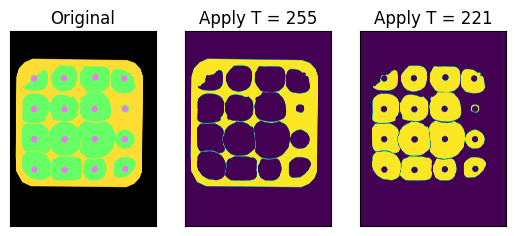

In [39]:
im = docImage(images_name_test[0])
plt.subplot(1, 3, 1)
plt.title("Original")
plt.xticks([]), plt.yticks([])

on = docTruthImage(annotations_name_test[0])
plt.imshow(on)
noo = np.array(on[:, :, 0])
noo[np.where(noo!=255)]=0
plt.subplot(1, 3, 2)
plt.title("Apply T = 255")
plt.xticks([]), plt.yticks([])
plt.imshow(noo)
no2 = np.array(on[:, :, 0])
print(np.unique(no2))
no2[np.where(no2!=102)]=0
plt.subplot(1, 3, 3)
plt.title("Apply T = 221")
plt.xticks([]), plt.yticks([])
plt.imshow(no2)
